In [4]:
# Loads
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display, uncomment while working

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Function to calculate confidence intervals
def confidence_interval_regressions(x_data, y_data, y_pred, x_plot, y_pred_for_x_plot, alpha=0.05):
    """
    Function Info
    
    Default values:
    alpha=0.5        - Assumed for 95% confidence interval
    """
    # Ensure inputs are 1D arrays
    x_data = np.asarray(x_data).flatten()
    y_data = np.asarray(y_data).flatten()
    y_pred = np.asarray(y_pred).flatten()
    x_plot = np.asarray(x_plot).flatten()
    y_pred_for_x_plot = np.asarray(y_pred_for_x_plot).flatten()
    
    n = len(x_data)
    mean_x = np.mean(x_data)
    SSD_x = np.sum((xi - mean_x)**2 for xi in x_data) # sum of squares of deviations for x
    residuals = y_data - y_pred # (actual - predicted)
    # Standard error of the regression (estimate of the error)
    SE_pred = np.sqrt(np.sum(residuals**2) / len(x_data))
    # inverse of Student's t-test two-tailed, using CDF of this distribution
    # Get the t-value for the two-tailed test using the inverse CDF (ppf)
    t_crit = stats.t.ppf(1 - alpha/2, n-2) # halve the probability for two-tailed test, n-2 degrees of freedom

    conf_SE = SE_pred*np.sqrt(1/n+(x_plot-mean_x)**2/SSD_x) # standard error of the estimate for CI
    lower_CI = y_pred_for_x_plot-t_crit*conf_SE
    upper_CI = y_pred_for_x_plot+t_crit*conf_SE

    pred_SE = SE_pred*np.sqrt(1+1/n+(x_plot-mean_x)**2/SSD_x) # standard error of the estimate for PI
    # print('pred_SE = ', pred_SE)
    lower_PI = y_pred_for_x_plot-t_crit*pred_SE
    upper_PI = y_pred_for_x_plot+t_crit*pred_SE

    return lower_CI, upper_CI, lower_PI, upper_PI

sklearn R^2 =  0.4222143361647369


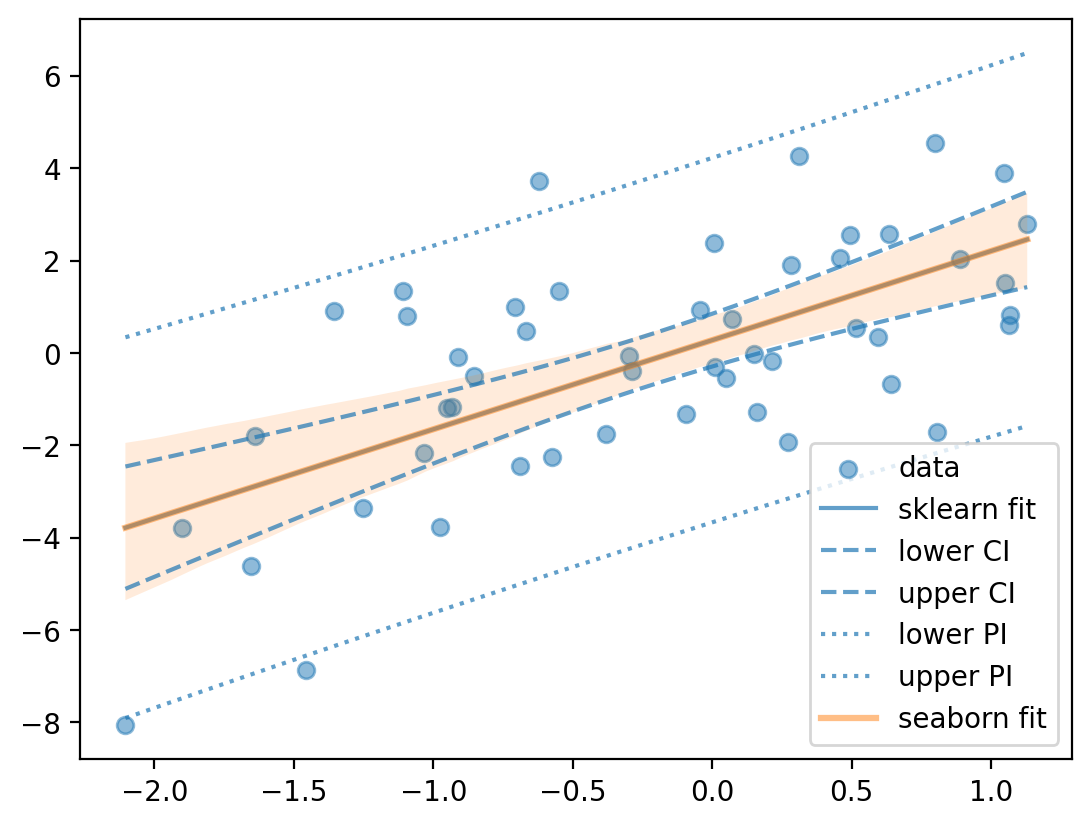

In [6]:
# x and y
x = np.array([0.88836785,  0.27300463,  0.63281967,  0.28418139, -0.68836318,  0.0053996,
  0.5937087,  -0.57393986, -0.29648141, -0.54783787, -0.91027493,  0.15962328,
 -1.63850544,  0.31289026,  0.46026594, -0.94966433, -1.45609351, -0.04250407,
  0.21646178,  0.15156213,  0.80076064, -1.10994329,  0.49442897,  0.51460128,
 -1.09284322, -0.66665459,  0.80690168, -1.25193885, -1.35508379,  1.04805275,
 -0.93303713, -2.10409963, -1.90153458, -1.03276918,  0.07257953,  0.0094949,
 -0.09482705, -0.97555037,  0.05037392,  1.13023282, -0.85344816, -1.6525646,
  1.06412739, -0.6200046,   1.05185597, -0.70665622, -0.38169883,  0.63999253,
 -0.28582479,  1.06668496])
y = np.array([2.02430054, -1.93257835,  2.58314175,  1.90087171, -2.44752933,  2.38156595,
  0.35036572, -2.24371153, -0.06905978,  1.3405465,  -0.07877987, -1.26904398,
 -1.80816646,  4.26218438,  2.05519289, -1.20130128, -6.87173595,  0.92909058,
 -0.17221329, -0.02974577,  4.5547338,   1.34453165,  2.54893582,  0.5325347,
  0.79862835,  0.46622416, -1.72158708, -3.35326105,  0.90533237,  3.88442638,
 -1.16130823, -8.05415752, -3.79318782, -2.17476758,  0.74344013, -0.31453794,
 -1.32347927, -3.77618995, -0.53477057,  2.7882873,  -0.49552787, -4.61883289,
  0.61341086,  3.72883991,  1.51113889,  1.0009881,  -1.75649956, -0.68361491,
 -0.38277411,  0.82526098])


# homebrew
x = x.reshape(-1,1)
model = LinearRegression().fit(x, y) # fit_intercept=False
x_plot = np.linspace(min(x), max(x), 100).reshape(-1,1)
y_plot = model.predict(x_plot) # y predictions for x_plot array
y_pred = model.predict(x)
r_sq = r2_score(y, y_pred)
print('sklearn R^2 = ', r_sq)

plt.scatter(x, y, label='data', color='tab:blue', alpha=0.5)
# plot WITH n in legend
plt.plot(x_plot, y_plot, alpha=0.7, ls='-', color='tab:blue', label='sklearn fit')

# confidence intervals homebrew func
lower_CI, upper_CI, lower_PI, upper_PI = confidence_interval_regressions(x, y, y_pred, x_plot, y_plot, alpha=0.05)
plt.plot(x_plot, lower_CI, alpha=0.7, ls='--', color='tab:blue', label='lower CI')
plt.plot(x_plot, upper_CI, alpha=0.7, ls='--', color='tab:blue', label='upper CI')
plt.plot(x_plot, lower_PI, alpha=0.7, ls=':', color='tab:blue', label='lower PI')
plt.plot(x_plot, upper_PI, alpha=0.7, ls=':', color='tab:blue', label='upper PI')

# Create a regression plot with only the confidence interval
sns.regplot(x=x, y=y, ci=95, scatter=False, line_kws={'alpha':0.5}, color='tab:orange', label='seaborn fit')

plt.legend()
plt.show()

